In [28]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [29]:
df = pd.read_csv("data/pr-clean-data.csv") #create data frame

In [30]:
df

,content
0,matahari mega mallkotatasikmalayamengalamikeba...
1,kepolisian resor kotatasikmalayaberhasil mena...
2,komisi perlindungan anak indonesia daerah kpa...
3,kondisi ruasjalandi wilayah kotatasikmalayasu...
4,angka cakupan pencapaian pelaksanaanvaksinpol...
...,...
195,penetapan lokasi penlok jalur jalantol kota t...
196,badan penanggulangan bencana daerah bpbd kota...
197,selasa september positifcovid kotatasikmalaya...
198,kelompokberandalan bermotor geng motor berula...


In [31]:
text = df['content'].dropna()
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

200
[['matahari', 'mega', 'mallkotatasikmalayamengalamikebakaranpada', 'jumat', 'juni', 'siang', 'momenkebakaranini', 'beredar', 'luas', 'media', 'sosial', 'salah', 'satunya', 'dibagikan', 'akun', 'instagram', 'infojawabarat', 'video', 'beredar', 'akun', 'instagram', 'pengunjung', 'pegawai', 'dimatahari', 'mega', 'mallberhamburan', 'menyelamatkan', 'asap', 'tebal', 'kobaran', 'api', 'menyelimuti', 'swalayan', 'ditasikmalayaitu', 'berdasarkan', 'informasi', 'beredar', 'kebakarandimatahari', 'mega', 'malltasikmalayaterjadi', 'sekira', 'wib', 'titikkebakarandisebut', 'area', 'gudang', 'lantai', 'mall', 'petugas', 'pemadamkebakaranlangsung', 'lokasi', 'berupaya', 'memadamkan', 'kobaran', 'api', 'butuh', 'memadamkan', 'kobaran', 'api', 'baca', 'polemik', 'ekspor', 'pasir', 'indonesia', 'pbb', 'serukan', 'aksi', 'lindungi', 'lautan', 'dunia', 'kepolisian', 'polsek', 'cihideung', 'polrestatasikmalayasudah', 'mengamankan', 'lokasi', 'aparat', 'langsung', 'mencari', 'penyebabkebakarandi', 'pusa

In [32]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [33]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<1357 unique tokens: ['akibat', 'aksi', 'aparat', 'api', 'area']...>


In [34]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

200
[(4, 2), (23, 3), (35, 9), (59, 2), (85, 11), (91, 4), (142, 4), (148, 2), (159, 4), (173, 1), (182, 1), (195, 1), (237, 1), (326, 2), (377, 1), (387, 2), (395, 4), (412, 1), (422, 1), (447, 2), (462, 4), (497, 2), (505, 1), (523, 1), (535, 9), (560, 1), (584, 2), (602, 1), (758, 2), (768, 3), (800, 1), (834, 1), (865, 5), (906, 1), (922, 3), (945, 1), (962, 2), (964, 10), (967, 5), (990, 2), (1021, 1), (1040, 1), (1042, 1), (1059, 1), (1060, 3), (1075, 1), (1106, 1), (1119, 15), (1132, 3), (1149, 4), (1197, 6), (1215, 1), (1235, 1), (1243, 9), (1293, 2)]


In [35]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

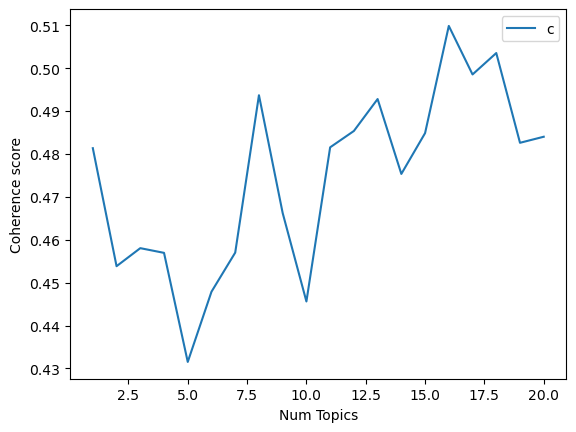

In [37]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.48135
Num Topics = 2  has Coherence Value of 0.453833
Num Topics = 3  has Coherence Value of 0.458039
Num Topics = 4  has Coherence Value of 0.456942
Num Topics = 5  has Coherence Value of 0.431512
Num Topics = 6  has Coherence Value of 0.44788
Num Topics = 7  has Coherence Value of 0.456999
Num Topics = 8  has Coherence Value of 0.4937
Num Topics = 9  has Coherence Value of 0.466224
Num Topics = 10  has Coherence Value of 0.445607
Num Topics = 11  has Coherence Value of 0.481549
Num Topics = 12  has Coherence Value of 0.48536
Num Topics = 13  has Coherence Value of 0.492807
Num Topics = 14  has Coherence Value of 0.475346
Num Topics = 15  has Coherence Value of 0.484861
Num Topics = 16  has Coherence Value of 0.509856
Num Topics = 17  has Coherence Value of 0.498538
Num Topics = 18  has Coherence Value of 0.503533
Num Topics = 19  has Coherence Value of 0.482605
Num Topics = 20  has Coherence Value of 0.484017


In [39]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.008*"wali_kota" + 0.005*"masjid" + 0.005*"zona_merah" + 0.005*"jumat_oktober" + 0.005*"pasar" + 0.005*"sabtu_oktober" + 0.005*"cheka_virgowansyah" + 0.004*"pembangunan" + 0.004*"rumah_sakit" + 0.004*"yaya_purnomo"
Topic: 1 Word: 0.005*"korban" + 0.005*"rumah_sakit" + 0.005*"berdasarkan_informasi" + 0.005*"penyebaran_covid" + 0.005*"ruang_isolasi" + 0.004*"probable" + 0.004*"gugus_tugas" + 0.004*"asep" + 0.004*"enam_orang" + 0.004*"percepatan_penanganancovid"
Topic: 2 Word: 0.006*"pandemi_covid" + 0.006*"rsud_dr" + 0.005*"dikota_tasikmalaya" + 0.005*"korban" + 0.005*"menjaga_jarak" + 0.004*"malam" + 0.004*"perayaan" + 0.004*"tenaga_kesehatan" + 0.004*"sungai" + 0.004*"pasien_terkonfirmasi"
Topic: 3 Word: 0.006*"mencapai_orang" + 0.005*"korban" + 0.005*"petani" + 0.004*"sungai" + 0.004*"memenuhi_kebutuhan" + 0.004*"budi" + 0.004*"lokasi_kejadian" + 0.004*"kepala_bidang" + 0.004*"umat" + 0.004*"angka_kematian"
Topic: 4 Word: 0.008*"wali_kota" + 0.007*"pemkot_tasikmalaya" 

In [40]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [41]:
print("Corpus Length:", len(corpus_tfidf))

Corpus Length: 200


In [42]:
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

In [43]:
df

,Topic,Word,P
0,0,wali_kota,0.007903
1,0,masjid,0.005370
2,0,zona_merah,0.005175
3,0,jumat_oktober,0.005136
4,0,pasar,0.005089
...,...,...,...
155,15,ruang_isolasi,0.004702
156,15,senin_desember,0.004577
157,15,jajang,0.004181
158,15,penyebaran_covid,0.004029


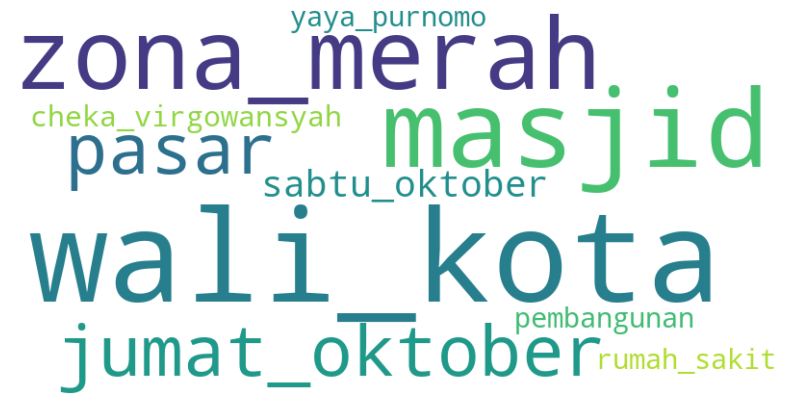

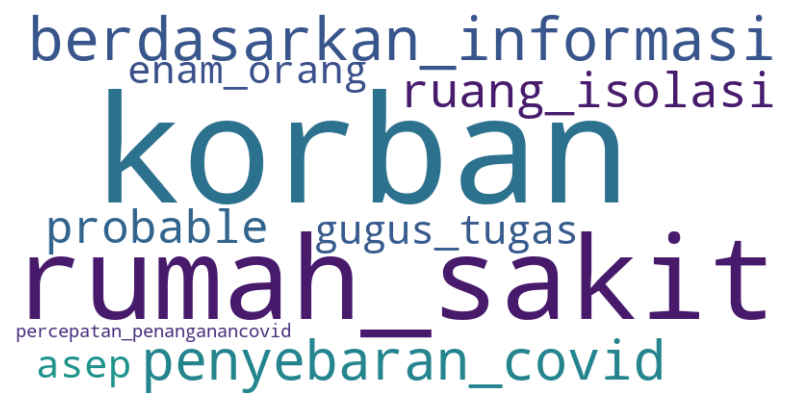

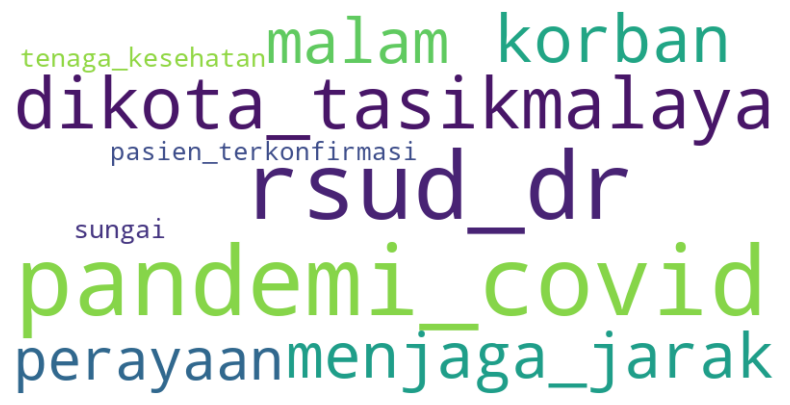

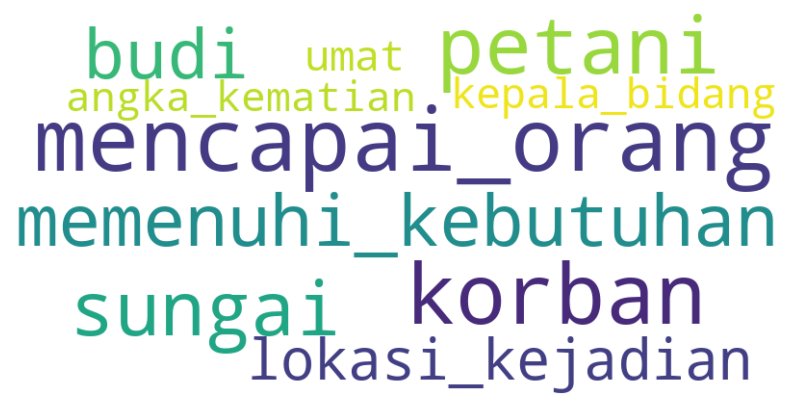

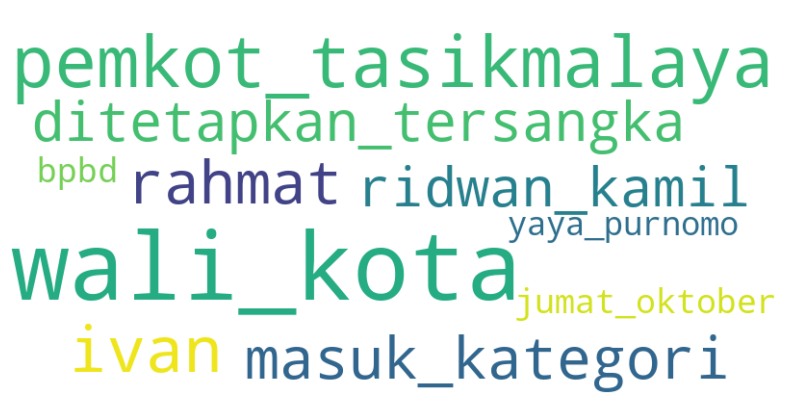

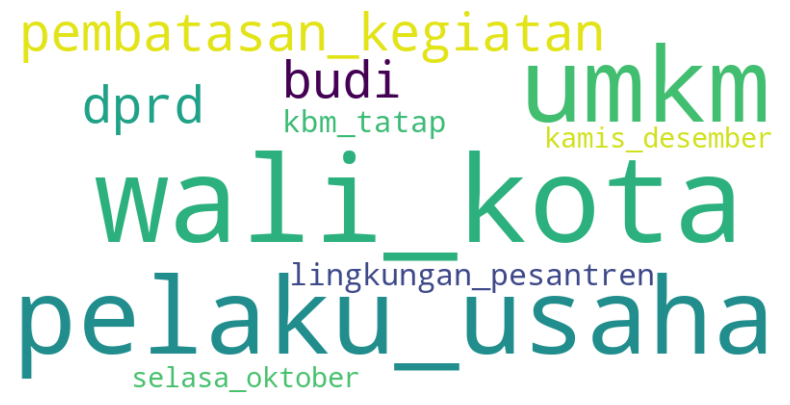

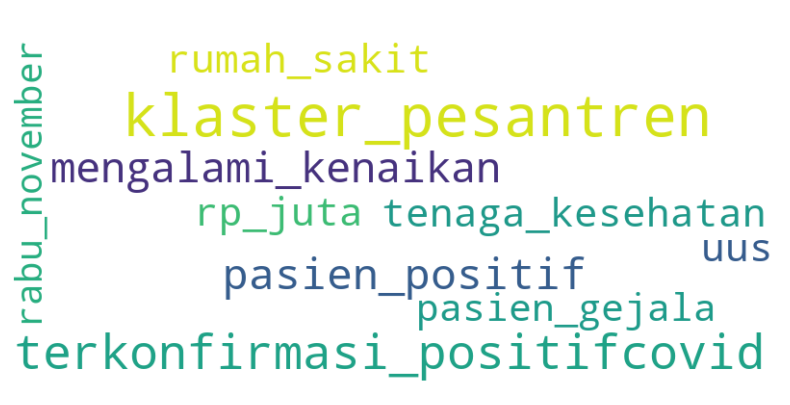

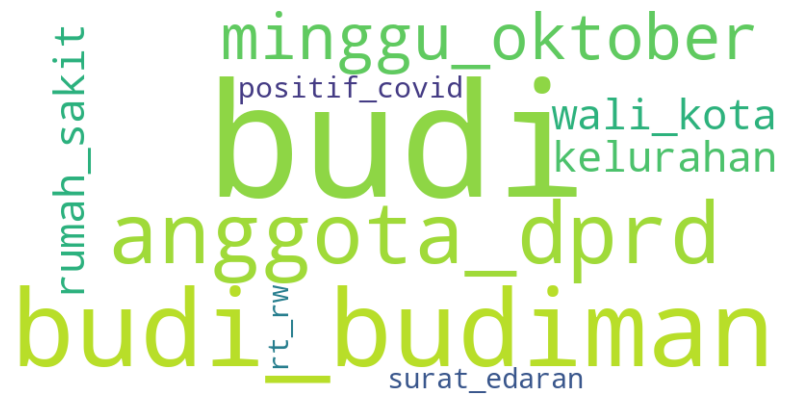

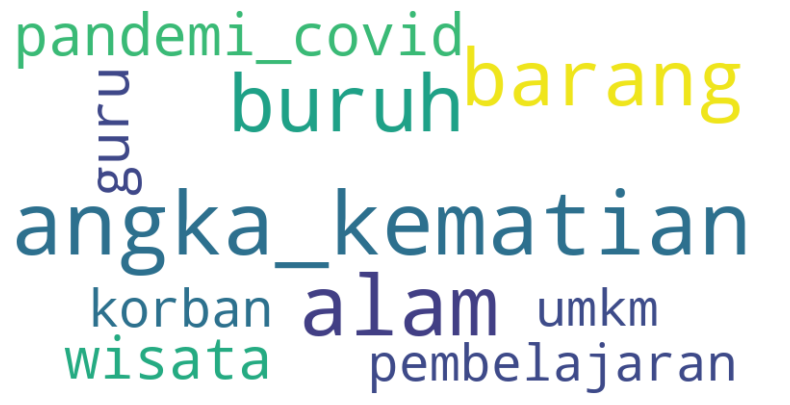

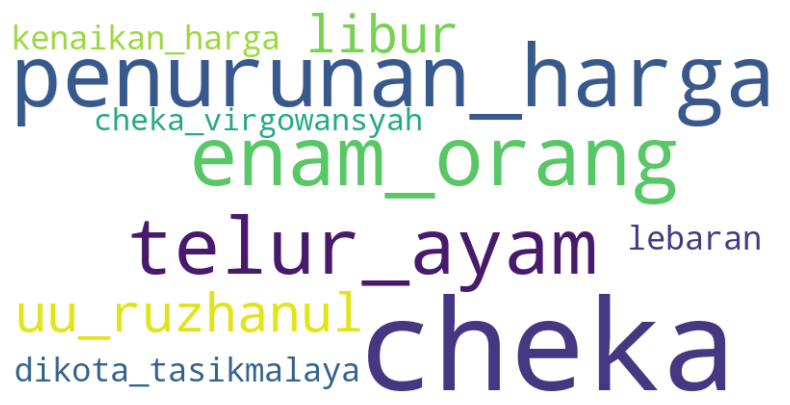

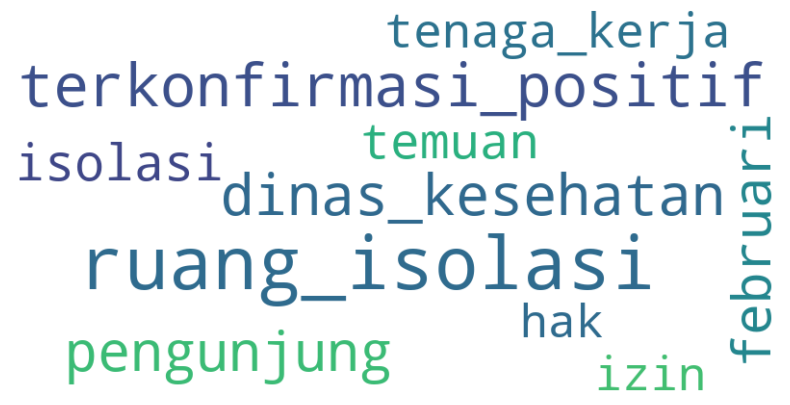

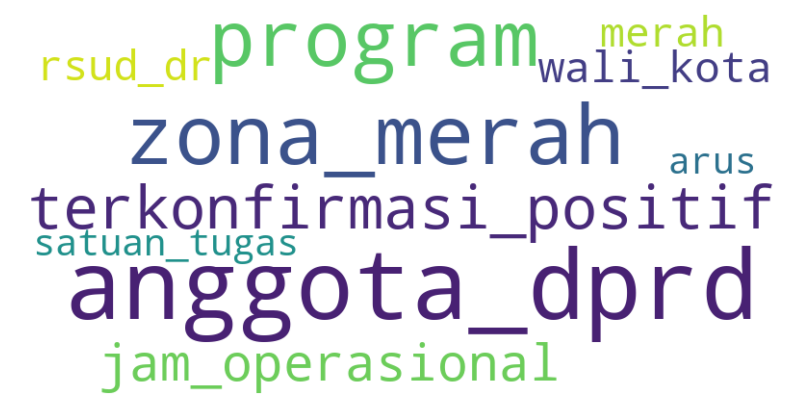

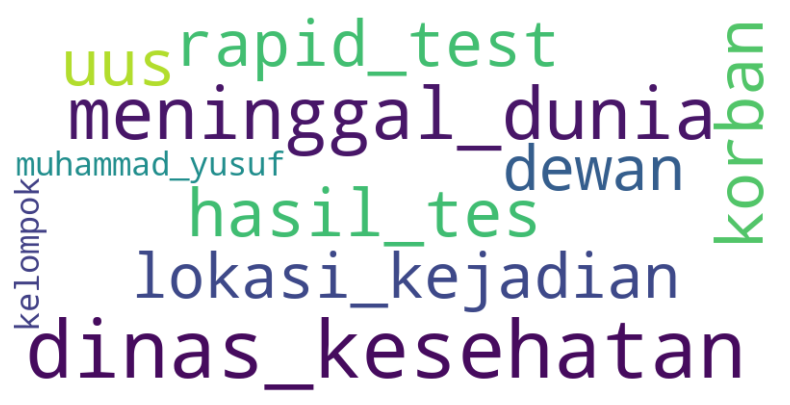

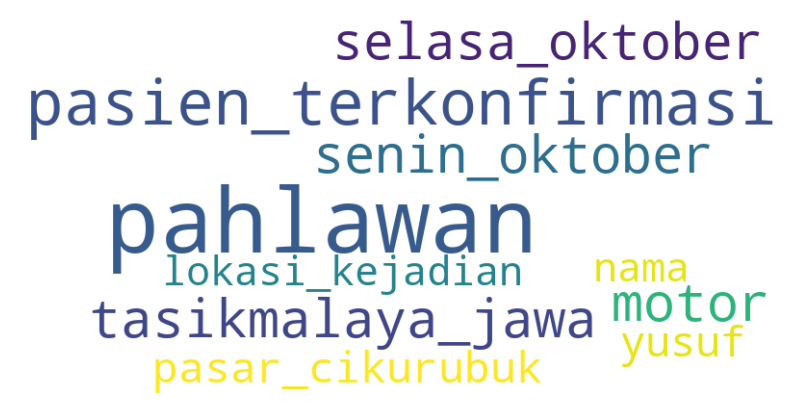

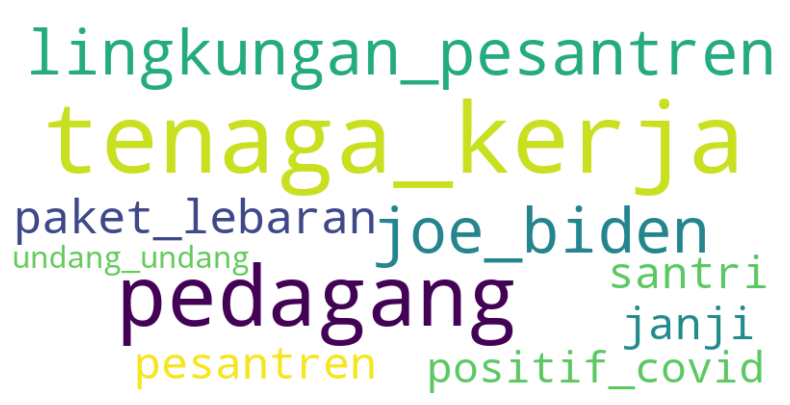

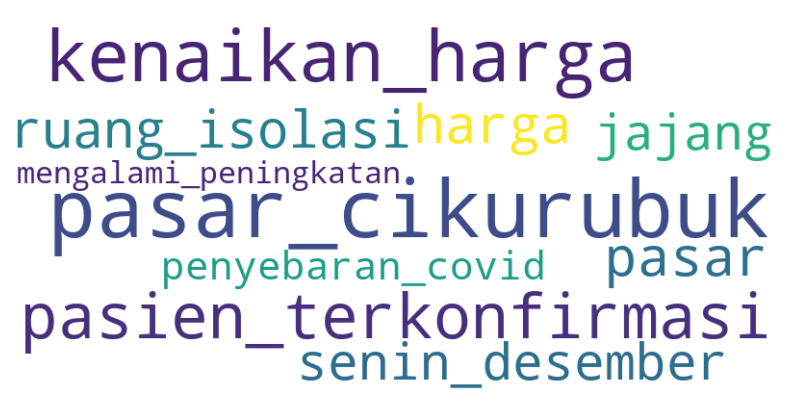

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already loaded the top words data into a DataFrame 'df'

# Create a function to generate a word cloud for a specific topic
def generate_word_cloud(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word clouds for each topic
for topic_id in range(model.num_topics):
    topic_words = dict(df[df['Topic'] == topic_id].set_index('Word')['P'])
    generate_word_cloud(topic_words)


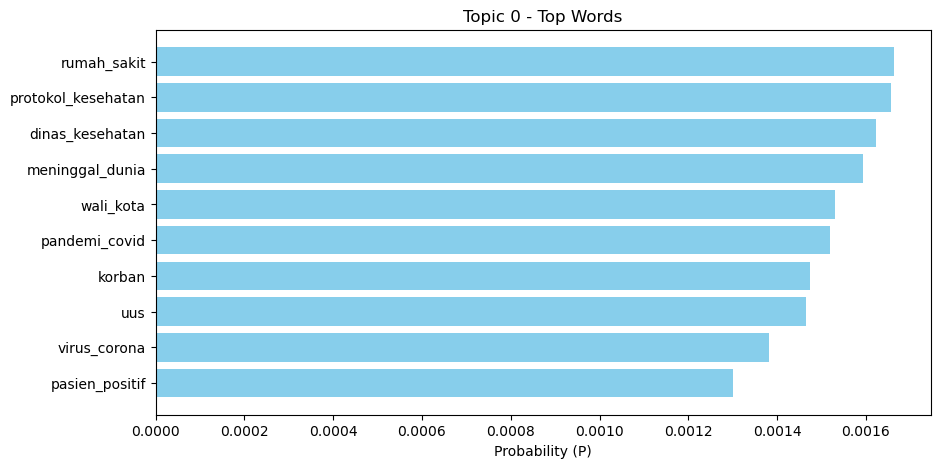

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Anggap Anda sudah memiliki data top words dalam DataFrame 'df'

# Iterasi melalui setiap topik dan membuat bar chart
for topic_id in range(model.num_topics):
    topic_words = df[df['Topic'] == topic_id]
    
    # Ambil kata-kata dan probabilitas
    words = topic_words['Word']
    probabilities = topic_words['P']
    
    # Buat bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(words)), probabilities, color='skyblue')
    plt.yticks(range(len(words)), words)
    plt.xlabel('Probability (P)')
    plt.title(f'Topic {topic_id} - Top Words')
    plt.gca().invert_yaxis()  # Reverse the order for better readability
    plt.show()
